# 第二次作业

## 朱杰 1500011610 物理学院

## 1.Runge 效应

### (a).
使用Lagrange插值，插值算法如下：

In [1]:
import numpy as np
from numpy import polymul, polyval, poly1d, polyadd

# L_j(x),j=0,1,2,...,n,n+1个数确定n阶多项式
def L(x, j):
    p = poly1d([1])
    n = x.size - 1
    for i in range(0, n + 1): # \Pi_{i=0,i!=j}^n(x-x[i])/(x[j]-x[i])
        if i != j:
            p = polymul(p, poly1d([1 / (x[j] - x[i]), -x[i] / (x[j] - x[i])]))
    return p

# Lagrange插值得到多项式
def poly_Lag(x, y):
    p = poly1d([0])
    n = x.size - 1
    for i in range(0, n + 1):
        p = polyadd(p, y[i] * L(x, i)) # sum of y[i]*L_i(x)
    return p


对$f(x)$的插值：

In [2]:
# 定义f(x)
def f(x): return 1 / (1 + 25 * x ** 2)

#x,y值的列表
xs = np.linspace(-1, 1, 21) # x
ys = f(xs) # y

# 插值多项式
p = poly_Lag(xs, ys)
f_p = lambda x: polyval(p, x) #f_p为插值后的函数

结果列表如下：

In [3]:
import pandas as pd

x_show1 = np.linspace(-1, 1, 41) # x
f_show1 = f(x_show1) # f(x)
p20_show = f_p(x_show1) # P20(x) 
dif_show1 = np.abs(f_show1 - p20_show) # 二者之差
pd.DataFrame({'x': x_show1,
              'f(x)': f_show1,
              'P20(x)': p20_show,
              '|f(x)-P20(x)|': dif_show1})

,P20(x),f(x),x,|f(x)-P20(x)|
0,0.038460,0.038462,-1.00,1.927311e-06
1,-39.952450,0.042440,-0.95,3.999489e+01
2,0.047058,0.047059,-0.90,5.606061e-07
3,3.454958,0.052459,-0.85,3.402498e+00
4,0.058823,0.058824,-0.80,1.441214e-07
5,-0.447052,0.066390,-0.75,5.134421e-01
6,0.075472,0.075472,-0.70,3.160471e-08
7,0.202423,0.086486,-0.65,1.159361e-01
8,0.100000,0.100000,-0.60,5.630298e-09
9,0.080660,0.116788,-0.55,3.612833e-02


结果绘图如下：

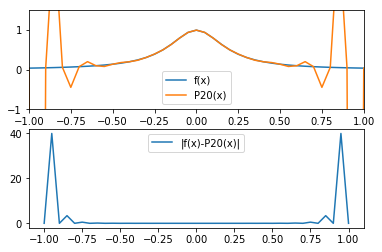

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x_show1, f_show1, label='f(x)')
plt.plot(x_show1, p20_show, label="P20(x)")
plt.legend()
plt.axis([-1, 1, -1, 1.5])
plt.subplot(2, 1, 2)
plt.plot(x_show1, dif_show1, label='|f(x)-P20(x)|')
plt.legend(loc=9)
plt.show()

### (b).
算法代码如下：

In [5]:
# Chebyshev多项式列表
t = [0] * 21  # 初始化列表
t[0:1] = [poly1d([1]), poly1d([1, 0])]
for i in range(2, 21):
    t[i] = polymul(poly1d([2, 0]), t[i - 1]) - t[i - 2]

In [6]:
# 进行系数计算
Num = 20
theta = np.array([np.pi * (k + 1 / 2) / Num for k in range(0, 20)])
x_zeros = np.cos(theta)  # 零点的集合
y_zeros = f(x_zeros)  # f(x)在零点的取值


def c_k(k):  # c_k为系数
    c = 0
    for i in range(0, Num):
        c += y_zeros[i] * np.cos(k * theta[i])
    return 2 * c / Num

In [7]:
# 合成拟合多项式
p_Chebyshev = poly1d([c_k(0) / 2])
for i in range(1, Num):
    p_Chebyshev += c_k(i) * t[i]


def f_Chebyshev(x): return polyval(p_Chebyshev, x)

结果列表如下：

In [8]:
# x_show2为Chebyshev多项式每个零点及其中点
x_show2 = np.zeros(2 * Num - 1)
for i in range(2 * Num - 1):
    if i % 2 == 0:
        x_show2[i] = x_zeros[i // 2]
    else:
        x_show2[i] = (x_zeros[i // 2] + x_zeros[i // 2 + 1]) / 2
f_show2 = f(x_show2)
Chebyshev_show2 = f_Chebyshev(x_show2)
diff_show2 = np.abs(Chebyshev_show2 - f_show2)

pd.DataFrame({'x': x_show2,
              'f(x)': f_show2,
              'C(x)': Chebyshev_show2 ,
              '|f(x)-C(x)|': diff_show2})

,C(x),f(x),x,|f(x)-C(x)|
0,0.038691,0.038691,9.969173e-01,1.370709e-12
1,0.041012,0.039623,9.846436e-01,1.389754e-03
2,0.040588,0.040588,9.723699e-01,7.369244e-13
3,0.041028,0.042601,9.481247e-01,1.573458e-03
4,0.044765,0.044765,9.238795e-01,1.429620e-13
5,0.050051,0.048251,8.882598e-01,1.800648e-03
6,0.052152,0.052152,8.526402e-01,5.495604e-15
7,0.055761,0.057931,8.065231e-01,2.169846e-03
8,0.064702,0.064702,7.604060e-01,1.829092e-14
9,0.077294,0.074499,7.049270e-01,2.795126e-03


结果绘图如下：

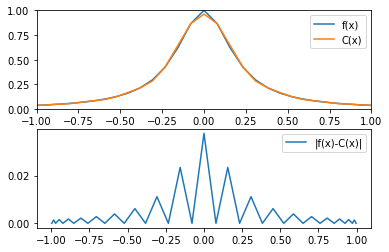

In [9]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x_show2, f_show2, label='f(x)')
plt.plot(x_show2, Chebyshev_show2, label="C(x)")
plt.legend()
plt.axis([-1, 1, 0, 1])
plt.subplot(2, 1, 2)
plt.plot(x_show2, diff_show2, label='|f(x)-C(x)|')
plt.legend()
plt.show()

相比之下，Chebyshev插值比普通多项式插值没有了龙格现象，与原函数差别也比较小。

### （c）

鉴于三次样条函数表达有点复杂，这里先写一个三次样条曲线插值的类，边界条件采用自然边界条件，即二阶导在边界确定且为0：

In [10]:
class spline3:
    # 一切符号表示与刘川老师讲义的相符
    n = 0  # 这里n是点的指标最大值，实际点数为n+1个
    xs = None  # 自变量列表，xs[0]到xs[n]
    ys = None  # 因变量列表
    M = None  # 矩
    h = None  # h[j+1]=x[j+1]-x[j]
    A = None  # 系数A
    B = None  # 系数B
    #  miu[j]M[j-1]+2M[j]+lambda[j]M[j+1]=d[j],j=1,2,...,n-1
    #  M[0]=0,M[n]=0,lambda[0]=0,miu[n]=0
    mat = None  # 解M时用到的矩阵
    d = None  # mat.M=d

    # 初始化函数
    def __init__(self, x, y):
        if x.shape != y.shape:
            print('error in dims')
        else:
            # 初始化常数
            self.xs = x
            self.ys = y
            self.n = self.xs.shape[0] - 1
            self.h = np.zeros(self.n + 1, dtype=float)
            self.M = np.zeros(self.n + 1, dtype=float)
            self.A = np.zeros(self.n + 1, dtype=float)
            self.B = np.zeros(self.n + 1, dtype=float)
            self.d = np.zeros(self.n + 1, dtype=float)
            self.mat = np.zeros([self.n + 1, self.n + 1], dtype=float)
            # 进行各项常数的计算，如函数名所示
            self.calc_h()
            self.calc_mat()
            self.calc_d()
            self.calc_M()
            self.calc_AB()

    def calc_h(self):
        for i in range(0, self.n):
            self.h[i + 1] = self.xs[i + 1] - self.xs[i]
            # h[0]为空值不用，有用的范围为h[1]到h[n]

    def calc_mat(self):
        self.mat[0, 0] = 2
        self.mat[0, 1] = 0
        self.mat[self.n, self.n - 1] = 0
        self.mat[self.n, self.n] = 2
        for i in range(1, self.n):
            self.mat[i, i - 1] = self.h[i] / (self.h[i] + self.h[i + 1])  # miu[i]
            self.mat[i, i] = 2
            self.mat[i, i + 1] = self.h[i + 1] / (self.h[i] + self.h[i + 1])  # lambda[i]

    def calc_d(self):
        self.d[0] = 0
        self.d[self.n] = 0
        for i in range(1, self.n):
            self.d[i] = 6 / (self.h[i] + self.h[i + 1]) * (
                (self.ys[i + 1] - self.ys[i]) / self.h[i + 1] - (self.ys[i] - self.ys[i - 1]) / self.h[i])

    def calc_M(self):
        self.M = np.linalg.solve(self.mat, self.d)

    def calc_AB(self):
        for i in range(0, self.n):
            self.B[i] = self.ys[i] - self.M[i] * self.h[i + 1] ** 2 / 6
            self.A[i] = (self.ys[i + 1] - self.ys[i]) / self.h[i + 1] - self.h[i + 1] * (self.M[i + 1] - self.M[i]) / 6

    # 计算样条函数在一点的函数值
    def eval(self, x):
        if x < self.xs[0] or x > self.xs[self.n]:
            print(x, 'is not in [', self.xs[0], ',', self.xs[self.n], ']')
        else:
            for i in range(0, self.n):
                if self.xs[i] <= x <= self.xs[i + 1]:
                    return self.M[i] * (self.xs[i + 1] - x) ** 3 / 6 / self.h[i + 1] + self.M[i + 1] * (x - self.xs[
                        i]) ** 3 / 6 / self.h[i + 1] + self.A[i] * (x - self.xs[i]) + self.B[i]


进行样条函数插值：

In [11]:
#x,y值的列表
xs = np.linspace(-1, 1, 21) # x
ys = f(xs) # y
sp = spline3(xs, ys)
x_show3 = np.linspace(-1, 1, 41)
f_show3 = f(x_show3)  # f (x)
sp_show = np.array([sp.eval(i) for i in x_show3])  # SP(x)
dif_show3 = np.abs(f_show3 - sp_show)  # 二者之差

列表如下：

In [12]:
pd.DataFrame({'x': x_show3,
              'f(x)': f_show3,
              'SP(x)': sp_show ,
              '|f(x)-SP(x)|': dif_show3})

,SP(x),f(x),x,|f(x)-SP(x)|
0,0.038462,0.038462,-1.00,0.000000e+00
1,0.042534,0.042440,-0.95,9.389813e-05
2,0.047059,0.047059,-0.90,0.000000e+00
3,0.052431,0.052459,-0.85,2.772903e-05
4,0.058824,0.058824,-0.80,0.000000e+00
5,0.066394,0.066390,-0.75,4.011889e-06
6,0.075472,0.075472,-0.70,0.000000e+00
7,0.086474,0.086486,-0.65,1.285531e-05
8,0.100000,0.100000,-0.60,0.000000e+00
9,0.116787,0.116788,-0.55,1.446703e-06


结果绘图如下：

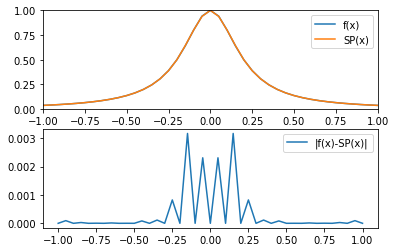

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x_show3, f_show3, label='f(x)')
plt.plot(x_show3, sp_show, label="SP(x)")
plt.legend()
plt.axis([-1, 1, 0, 1])
plt.subplot(2, 1, 2)
plt.plot(x_show3, dif_show3, label='|f(x)-SP(x)|')
plt.legend(loc=1)
plt.show()

相比之下，三次样条函数误差最小，和原函数的绘图可以看到二者几乎是完全重叠的。

## 2. 样条函数在计算机绘图中的运用

### （a）
计算与列表如下

In [14]:
# 定义函数
def r(phi): return 1 - np.cos(phi)


# 一切变量命名与题目相符 
t = np.arange(0, 9)  # t
phi = t * np.pi / 4  # phi
xt = r(phi) * np.cos(phi)  # xt
yt = r(phi) * np.sin(phi)  # yt

#列表
pd.DataFrame({'t': t,
              'phi': phi,
              'xt': xt,
              'yt': yt})

,phi,t,xt,yt
0,0.000000,0,0.000000e+00,0.000000e+00
1,0.785398,1,2.071068e-01,2.071068e-01
2,1.570796,2,6.123234e-17,1.000000e+00
3,2.356194,3,-1.207107e+00,1.207107e+00
4,3.141593,4,-2.000000e+00,2.449294e-16
5,3.926991,5,-1.207107e+00,-1.207107e+00
6,4.712389,6,-1.836970e-16,-1.000000e+00
7,5.497787,7,2.071068e-01,-2.071068e-01
8,6.283185,8,0.000000e+00,-0.000000e+00


### (b)
进行插值：

In [15]:
spx = spline3(phi, xt)
spy = spline3(phi, yt)

### (c)
绘图：

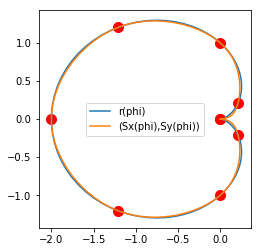

In [16]:
phis = np.linspace(0, 2 * np.pi, 100)
xts = r(phis) * np.cos(phis)
yts = r(phis) * np.sin(phis)
sxts = np.array([spx.eval(i) for i in phis])
syts = np.array([spy.eval(i) for i in phis])

plt.figure()
plt.subplot(1, 1, 1)
plt.plot(xts, yts, label='r(phi)')
plt.plot(sxts, syts, label='(Sx(phi),Sy(phi))')
plt.scatter(xt, yt, s=100, c='r')
plt.axes().set_aspect(0.9)
plt.legend()
plt.show()


### (d)
由于三次样条函数对变量的一阶导连续，即$\frac{\partial S\Delta(X;t)}{\partial t}$与$\frac{\partial S\Delta(Y;t)}{\partial t}$连续，故
$\frac{\partial S\Delta(Y;t)}{\partial S\Delta(X;t)}=\frac{\partial S\Delta(Y;t)}{\partial t}/\frac{\partial S\Delta(X;t)}{\partial t}$连续，从而绘制出来的曲线光滑

## 3. 含有zeta 函数的方程求解

### (a).

当$l=m=0$时，$y_{00}=1/\sqrt{4\pi}$， $z_{00}(1;q^2)=y_{00}\sum_{n}\frac{e^{q^2-|n|^2}}{|n|^2-q^2}-\pi+\frac{\pi}{2}\dot \int_0^1dtt^{-3/2}(e^{tq^2}-1)+\pi y_{00}\sum_{n\ne 0}\int_0^1dtt^{-3/2}e^{tq^2}e^{-(\pi^2/t)|n|^2}$

设当$|n|^2=n_0$时，$n=(n_x,n_y,n_z)$的数目（简并度）为$g(n_0)$，有$g(n_0)\simeq4\pi n_0$，更精确实现如下

In [17]:
from numba import jit

@jit
def g(n):
    l = 0
    for i in range(-n, n + 1):
        for j in range(-n, n + 1):
            for k in range(-n, n + 1):
                if i ^ 2 + j ^ 2 + k ^ 2 == n:
                    l += 1
    return l


从表达式易知，当$q^2$变大时，第三项与第四项的积分是变大的，从而当$q^2$很小时，影响$z_{00}(1;q^2)$数量级变化的主要为第一项求和中n=(0,0,0)的一项：

$y_{00}\frac{e^{q^2}}{-q^2}\sim -y_{00}{(q^2)^{-1}}$

设精确度要求为$\epsilon$，当$q^2$很小时，设第一项求和要求达到 $|n|=n_0$，至少有$y_{00}\cdot g(n_0^2)\cdot\frac{e^{q^2-n_0^2}}{n_0^2-q^2}\sim
y_{00}\cdot g(n_0)\cdot\frac{e^{-n_0^2}}{n_0^2}=\epsilon\cdot y_{00}{(q^2)^{-1}}$

故$g(n_0^2)\frac{e^{-n_0^2}}{n_0^2}=\epsilon\cdot (q^2)^{-1}$

当$n_0^2$变化时，$f_1(n_0^2)=g(n_0^2)\frac{e^{-n_0^2}}{n_0^2}$变化如下：

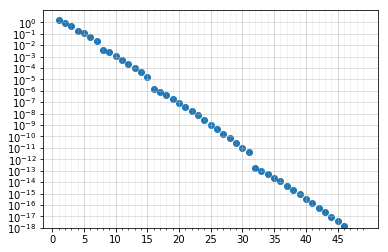

In [18]:
def f1(n): return g(n) * np.exp(-n) / n


cl1 = range(1, 50)
da1 = list(map(f1, cl1))
yranges = [10 ** i for i in range(-18, 1)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(cl1, da1)
ax.set_yscale('log')
ax.set_xticks(range(0, 50, 5))
ax.set_xticks(cl1, minor=True)
ax.set_yticks(yranges)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.show()


由此可见，当$q^2\sim10^{-3}$时，n的模方取10即可满足6位精度，n的模方取25即可满足12位精度

当$q^2\sim10^{-7}$时，n的模方取0即可满足6位精度，n的模方取15即可满足12位精度

当$q^2<10^{-13}$时，n的模方取0即可满足12位精度

由于$f_1(n_0^2)\simeq4\pi e^{-n_0^2}$，故当$10^{-3}>q^2>10^{-7}$时，n的模方取$-\ln(\epsilon)+\ln(q^2)+\ln(4\pi)$即可满足$\epsilon$的精度

当$q^2\in(0,3)$时，由于第二项$\pi$的存在，在非零点附近，函数的数量级至少是O(1)的。$y_{00}\cdot g(n_0)\cdot\frac{e^{q^2-n_0^2}}{n_0^2-q^2}\sim
y_{00}\cdot g(n_0)\cdot\frac{e^{3-n_0^2}}{n_0^2}\simeq5.6\cdot f_1(n_0) $

故6位精度需要n的模方至少为18，此时n的数目为341

12位精度需要n的模方至少为31，此时n的数目为739

对于第三项的积分，有$e^{tq^2}\in(1,e^3)$，$\int_0^1dtt^{-3/2}e^{tq^2}e^{-(\pi^2/t)n_0^2}=C(\lambda)\int_0^1dtt^{-3/2}e^{-(\pi^2/t)n_0^2}=C(\lambda)\frac{erfc(\pi n_0)}{n0\sqrt{\pi}}$，$C(\lambda)\in(1,e^3)$

故$\pi y_{00}\cdot g(n_0^2)\cdot\int_0^1dtt^{-3/2}e^{tq^2}e^{-(\pi^2/t)n_0^2}=y_{00} \sqrt{\pi}C(\lambda)g(n_0^2) \cdot \frac{erfc(\pi n_0)}{ n_0}$

当$q^2<<1$时，$C(\lambda)\simeq1$，由$y_{00} \sqrt{\pi}C(\lambda)g(n_0^2) \cdot \frac{erfc(\pi n_0)}{ n_0}=\epsilon\cdot y_{00}{(q^2)^{-1}}$

得$f_2(n_0^2)=\sqrt{\pi}g(n_0^2) \cdot \frac{erfc(\pi n_0)}{ n_0}=\epsilon\cdot{(q^2)^{-1}}$，$f_2(n^2)$的前几个计算结果如下：

In [19]:
from scipy import special

def f2(n): return np.sqrt(np.pi) * g(n) * special.erfc(np.pi * np.sqrt(n)) / np.sqrt(n)

cl2 = range(1, 6)
da2 = list(map(f2, cl2))
pd.DataFrame(columns=(["n^2"]+list(cl2)),data=[["f2(n^2)"]+da2])

,n^2,1,2,3,4,5
0,f2(n^2),0.000063,5.404502e-09,3.900328e-13,2.362894e-17,1.913490e-21


由此可见，当$q^2\sim10^{-3}$时，不需要计算任何项可满足6位精度，n的模方取2即可满足12位精度

当$q^2\sim10^{-4}$时，不需要计算任何项可满足6位精度，n的模方取1即可满足12位精度

当$q^2<10^{-8}$时，不需要计算任何项可满足12位精度

当$q^2\in(0,3)$时，取$C(q^2)=e^3$，则$C(\lambda)\simeq1$，由$y_{00} \sqrt{\pi}C(\lambda)g(n_0^2) \cdot \frac{erfc(\pi n_0)}{ n_0}\simeq5.6\cdot f_2(n_0) $

故6位精度需要n的模方至少为1，此时n的数目为6

12位精度需要n的模方至少为3，此时n的数目为26

### (b)

当$q^2\lesssim 1$时，有$z_{00}(1;q^2)=\pi^{3/2}qcot\delta_0(q^2)=\pi^{3/2}(\frac{1}{A}+\frac{R_0}{2}q^2)\in(5.57,6.96)$

故$z_{00}(1;q^2)$的数量级为O(1)

对于$z_{00}(1;q^2)$表达式的第三项的积分，由于$\int_0^1dtt^{-3/2}(e^{tq^2}-1)=2+2e^{q^2}(-1+2q\cdot dowsn(q))$

其中dowsn(q)为道森积分，在scipy.special里有精确实现，得计算代码如下：

In [20]:
# 第二部分积分计算
@jit
def int2(q): return 2 + 2 * np.exp(q) * (-1 + 2 * np.sqrt(q) * special.dawsn(np.sqrt(q)))


对于第四部分的积分，采用数值积分的方法来计算，首先写一个计算数值积分的函数，于是得计算代码如下：

In [21]:
# ------------------------------------------------------------
# 以下一系列函数用于计算f的积分
# 考虑到计算可能会慢，使用jit加速计算

# f在区间[a,b]上面的积分
# 采用7个点的Newton-Cortes积分法
@jit
def int_part(f, a, b):
    pts = np.linspace(a, b, 7)
    sigmas = np.array([41, 216, 27, 272, 27, 216, 41], dtype=float) / 840.
    return np.sum(np.vectorize(f)(pts) * sigmas) * (b - a)


# 在[a1,a2,a3...,an]上取所有的两个点之间进行f积分的求和
@jit
def int_sequence(f, array):
    s = 0
    num = array.shape[0]
    for i in range(0, num - 1):
        s += int_part(f, array[i], array[i + 1])
    return s


# 在一个序列之间插入中点
@jit
def addmidpoint(a):
    n = a.shape[0]
    b = np.zeros(2 * n - 1)
    for i in range(2 * n - 1):
        if i % 2 == 0:
            b[i] = a[i // 2]
        else:
            b[i] = (a[i // 2] + a[i // 2 + 1]) / 2
    return b


# f(x)在区间(a,b)的精确积分，e为精确度设置
@jit
def int(f, a, b, e):
    var1 = np.array([a, b], dtype=float)
    var2 = addmidpoint(var1)
    result1 = int_part(f, a, b)
    result2 = int_sequence(f, var2)
    while np.abs(result1 - result2) > e:
        result1 = result2
        var1 = var2
        var2 = addmidpoint(var1)
        result2 = int_sequence(f, var2)
    return result2

从而第四部分的单个积分值如下：

In [22]:
# 第四部分的积分值
# q为q^2,n为矢量n的模方,t为被积分变量
@jit
def f4(q, n, t):
    if t == 0:
        return 0
    else:
        return np.power(t, -3 / 2) * np.exp(t * q - np.pi ** 2 * n / t)


def int4(q, n, e): return int(lambda x: f4(q, n, x), 0, 1, e)


第四部分求和，实际上只要求|n|=1的情况乘以6，代码如下：

In [23]:
def sum4(q): return 6*int4(q, 1, 1e-8) # 精确度多设置了一点


第一部分求和：

In [24]:
# ---------------------------------------------------------------------
# 计算求和的指标
# 第一项需要求和的数目
y00 = 1 / np.sqrt(4 * np.pi)
ns1 = []
for i in range(-6, 7):
    for j in range(-6, 7):
        for k in range(-6, 7):
            if i ** 2 + j ** 2 + k ** 2 <= 20: # 多计算了几项
                ns1.append([i, j, k])

                
# 计算模方
def norm2(n): return n[0] ** 2 + n[1] ** 2 + n[2] ** 2


# q为q^2
@jit
def sum1(q):
    s = 0
    for i in ns1:
        s += np.exp(q - norm2(i)) / (norm2(i) - q)
    return y00 * s


于是得到$z_{00}(1;q^2)$的实现：

In [25]:
# z00(1,q)的实现
def z00(q):
    return sum1(q) - np.pi + np.pi / 2 * int2(q) + sum4(q)

写一个割线法求方程解的程序：

In [26]:
# --------------------------
# 割线法求方程解
def findroot(f, x1, x2, e):
    t1, t2 = x1, x2
    f1, f2 = f(x1), f(x2)
    while np.abs(t1 - t2) > e:
        t1, t2 = t2, t2 - (t2 - t1) * f2 / (f2 - f1)
        f1, f2 = f2, f(t2)
    return t2

从而求根如下：

In [27]:
# -------------
# 左边函数
def left(q): return np.power(np.pi, 3 / 2) * (1 + 0.5 / 2 * q)


# 二者之差
def diff(q): return z00(q) - left(q)

print(findroot(diff, 0.7, 0.8, 1e-7))

0.794515497205


故6位有效数字为0.794515